# Домашнее задание №1(2). DimensionalityReduction

### Алгоритмы уменьшения размерности 

#### Повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf). Необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Загрузка данных

**1. COIL20**

In [2]:
from scipy import io
mat = io.loadmat('COIL20.mat?raw=true')
coil_x = mat['X']
coil_y = mat['Y']

**2. MNIST**

In [3]:
from sklearn.datasets import load_digits
mnist_ds = load_digits()
mnist = pd.DataFrame(mnist_ds.data)

**3. Fashion MNIST**

In [4]:
import dataget
__, __, fmnist_x, fmnist_y = dataget.image.fashion_mnist().get()
fmnist = fmnist_x.reshape(-1, 28*28)

**4. Google News**

In [5]:
from gensim.downloader import load
word2vec = load('word2vec-google-news-300').vectors
word2vec = word2vec[:30000] #10%

In [6]:
datasets = [
  ("COIL20", coil_x, coil_y),
  ("MNIST", mnist, mnist_ds.target),
  ("Fashion MNIST", fmnist, fmnist_y),
  ("Word Vectors", word2vec, None)
]

## Загрузка алгоритмов

In [7]:
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=2)
tsne = TSNE(n_jobs=-1, random_state=2)
umap = UMAP(random_state = 2)
algorithms = [
  ("UMAP", umap),
  ("t-SNE", tsne),
  ("PCA", pca)
]

## Эксперименты

Dataset: COIL20 ((1440, 1024))
Algorithm: UMAP
Time: 7 seconds
_________________________________________
Dataset: MNIST ((1797, 64))
Algorithm: UMAP
Time: 4 seconds
_________________________________________
Dataset: Fashion MNIST ((10000, 784))
Algorithm: UMAP
Time: 21 seconds
_________________________________________
Dataset: Word Vectors ((30000, 300))
Algorithm: UMAP
Time: 18 seconds
_________________________________________
Dataset: COIL20 ((1440, 1024))
Algorithm: t-SNE
Time: 3 seconds
_________________________________________
Dataset: MNIST ((1797, 64))
Algorithm: t-SNE
Time: 4 seconds
_________________________________________
Dataset: Fashion MNIST ((10000, 784))
Algorithm: t-SNE
Time: 39 seconds
_________________________________________
Dataset: Word Vectors ((30000, 300))
Algorithm: t-SNE
Time: 205 seconds
_________________________________________
Dataset: COIL20 ((1440, 1024))
Algorithm: PCA
Time: 0 seconds
_________________________________________
Dataset: MNIST ((1797, 64))

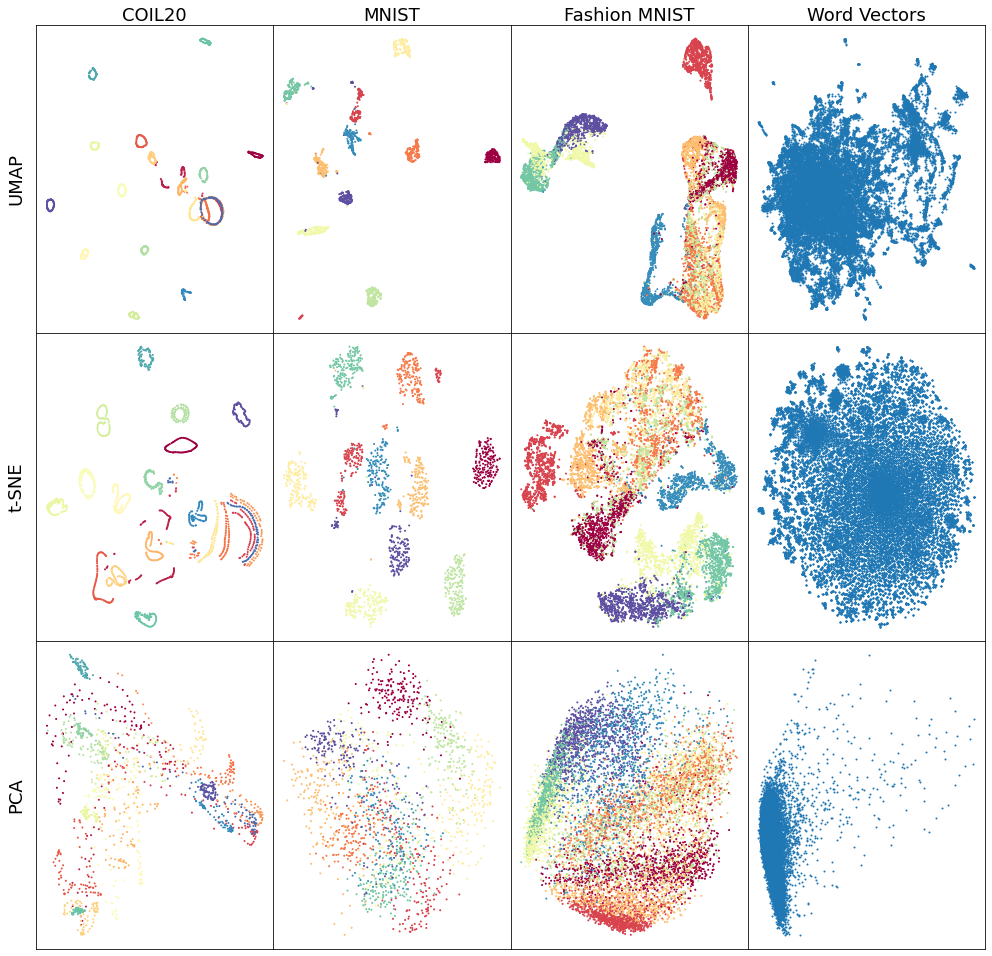

In [8]:
import matplotlib.pyplot as plt
import time

algsNum = len(algorithms)
dsNum = len(datasets)
fig, ax = plt.subplots(algsNum, dsNum, figsize=(17,17))
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(algsNum):
    ax[i,0].set_ylabel(algorithms[i][0], fontsize=18)
    for j in range(dsNum):
        ax[0,j].set_xlabel(datasets[j][0], fontsize=18)
        ax[0,j].xaxis.set_label_position('top')
        print(f"Dataset: {datasets[j][0]} ({datasets[j][1].shape})")
        print(f"Algorithm: {algorithms[i][0]}")
        start = time.time()
        embedding = algorithms[i][1].fit_transform(datasets[j][1])
        ax[i, j].scatter(embedding[:, 0], embedding[:, 1], c=datasets[j][2], cmap='Spectral', s=1)
        ax[i, j].set_yticklabels([])
        ax[i, j].set_xticklabels([])
        ax[i, j].tick_params(left = False, bottom=False)
        print(f"Time: {int(time.time() - start)} seconds")
        print("_________________________________________")
        

## Вывод

#### UMAP
* Сохраняет локальную структуру
* Хорошо отражает большую часть крупномасштабной глобальной структуры

#### t-SNE
* Сохраняет локальную структуру
* Самый медленный (худшее время на данных Word Vectors)

#### PCA
* Самый быстрый (на всех наборах данных)